In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from ydata_profiling import ProfileReport
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
%matplotlib inline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [111]:
df=pd.read_excel('autos_dataset.xlsx')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [112]:
df.replace('?',np.nan,inplace=True)
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [113]:
a=['normalized-losses','bore','stroke','horsepower','peak-rpm','price'] #columns with null

In [114]:
for i in a:
    df[i].fillna(df[i].median(),inplace=True) #replacing null values with median

In [115]:
df['num-of-doors'].fillna('four',inplace=True) #replacing null str value with str

In [116]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [117]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [118]:
b=df.describe().columns
b

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [119]:
c=['normalized-losses','wheel-base','width','engine-size','stroke','compression-ratio','horsepower',
  'peak-rpm','city-mpg'] #columns num with outliers

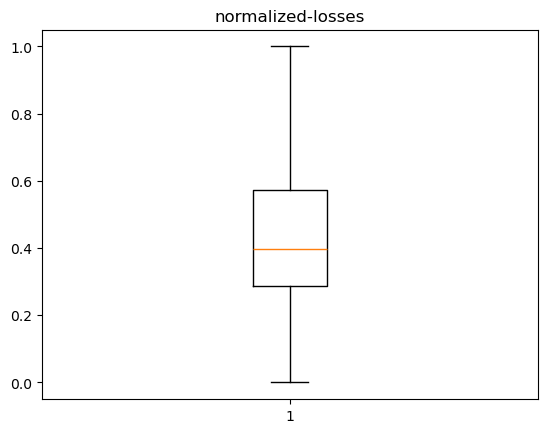

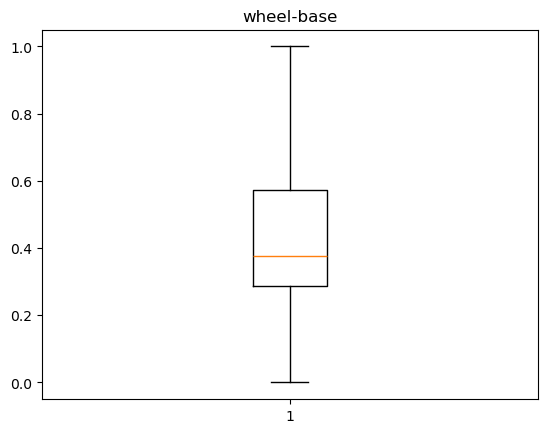

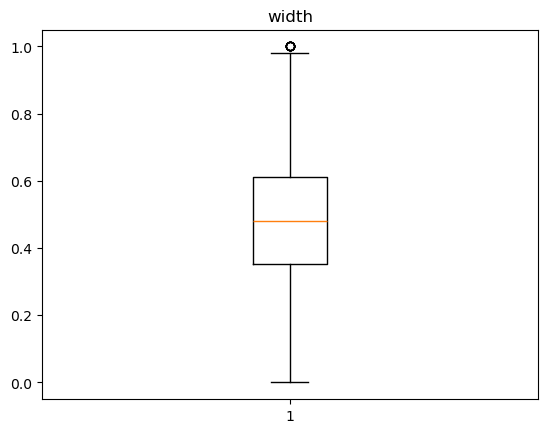

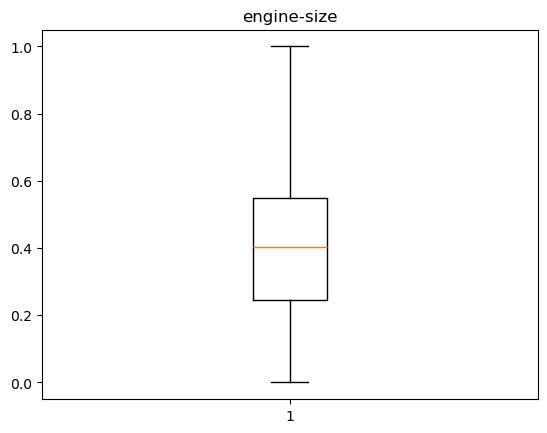

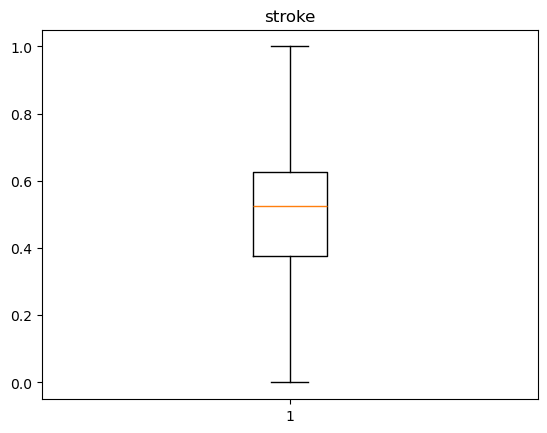

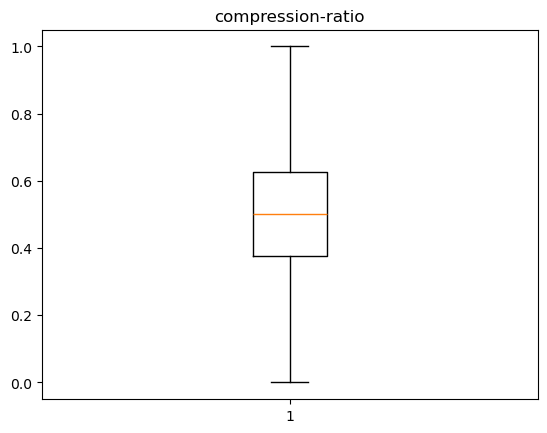

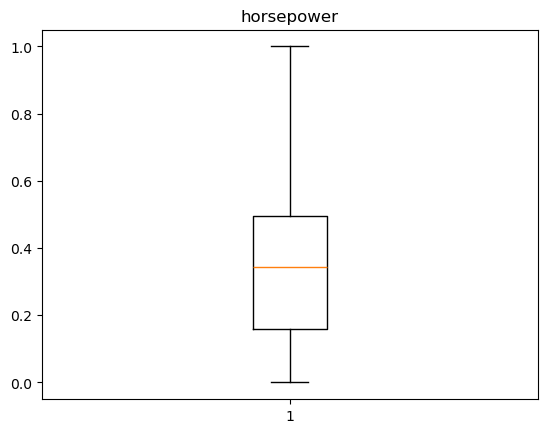

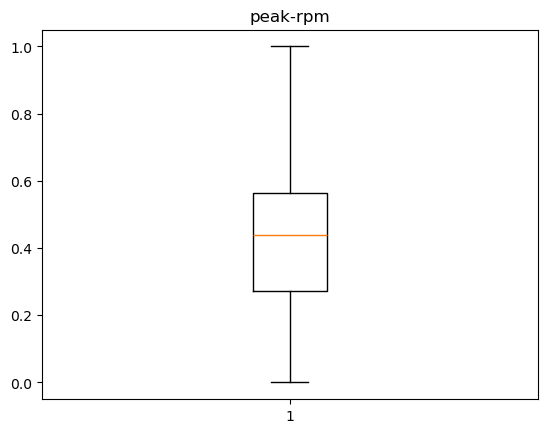

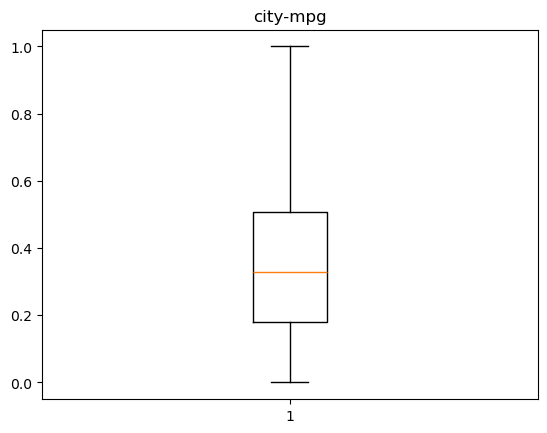

In [158]:
for i in c: #removing outliers
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    df.loc[df[i]>upper,i]=upper
    df.loc[df[i]<lower,i]=lower

In [159]:
df.info() #obj columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    float64
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    int32  
 3   fuel-type          205 non-null    int32  
 4   aspiration         205 non-null    int32  
 5   num-of-doors       205 non-null    int32  
 6   body-style         205 non-null    int32  
 7   drive-wheels       205 non-null    int32  
 8   engine-location    205 non-null    int32  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    float64
 14  engine-type        205 non-null    int32  
 15  num-of-cylinders   205 non-null    int32  
 16  engine-size        205 non

In [160]:
#obj columns
p=['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']

In [161]:
r=LabelEncoder()

In [162]:
for i in p:
    df[i]=r.fit_transform(df[i])

In [163]:
#scaling
d=['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg']

In [164]:
u=MinMaxScaler()

In [165]:
for i in d:
    df[i]=u.fit_transform(df[[i]])

In [166]:
df['price']=np.log(df['price'])
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.396825,0,1,0,1,0,2,0,0.072333,...,0.472603,5,0.664286,0.016667,0.50000,0.459854,0.354167,0.238806,0.289474,2.252352
1,1.0,0.396825,0,1,0,1,0,2,0,0.072333,...,0.472603,5,0.664286,0.016667,0.50000,0.459854,0.354167,0.238806,0.289474,2.273271
2,0.6,0.396825,0,1,0,1,2,2,0,0.285714,...,0.623288,5,0.100000,0.675000,0.50000,0.773723,0.354167,0.179104,0.263158,2.273271
3,0.8,0.785714,1,1,0,0,3,1,0,0.477396,...,0.328767,5,0.464286,0.616667,0.81250,0.394161,0.562500,0.328358,0.368421,2.255833
4,0.8,0.785714,1,1,0,0,3,0,0,0.462929,...,0.513699,5,0.464286,0.616667,0.18750,0.489051,0.562500,0.149254,0.157895,2.279019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.238095,21,1,0,0,3,2,0,0.813743,...,0.547945,5,0.885714,0.408333,0.65625,0.481752,0.520833,0.298507,0.315789,2.275400
201,0.2,0.238095,21,1,1,0,3,2,0,0.813743,...,0.547945,5,0.885714,0.408333,0.40625,0.817518,0.479167,0.179104,0.236842,2.287934
202,0.2,0.238095,21,1,0,0,3,2,0,0.813743,...,0.767123,5,0.742857,0.175000,0.43750,0.627737,0.562500,0.149254,0.184211,2.300093
203,0.2,0.238095,21,0,1,0,3,2,0,0.813743,...,0.575342,3,0.335714,0.616667,1.00000,0.423358,0.270833,0.388060,0.289474,2.304577


In [167]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.396825,0,1,0,1,0,2,0,0.072333,...,0.472603,5,0.664286,0.016667,0.50000,0.459854,0.354167,0.238806,0.289474,2.252352
1,1.0,0.396825,0,1,0,1,0,2,0,0.072333,...,0.472603,5,0.664286,0.016667,0.50000,0.459854,0.354167,0.238806,0.289474,2.273271
2,0.6,0.396825,0,1,0,1,2,2,0,0.285714,...,0.623288,5,0.100000,0.675000,0.50000,0.773723,0.354167,0.179104,0.263158,2.273271
3,0.8,0.785714,1,1,0,0,3,1,0,0.477396,...,0.328767,5,0.464286,0.616667,0.81250,0.394161,0.562500,0.328358,0.368421,2.255833
4,0.8,0.785714,1,1,0,0,3,0,0,0.462929,...,0.513699,5,0.464286,0.616667,0.18750,0.489051,0.562500,0.149254,0.157895,2.279019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.238095,21,1,0,0,3,2,0,0.813743,...,0.547945,5,0.885714,0.408333,0.65625,0.481752,0.520833,0.298507,0.315789,2.275400
201,0.2,0.238095,21,1,1,0,3,2,0,0.813743,...,0.547945,5,0.885714,0.408333,0.40625,0.817518,0.479167,0.179104,0.236842,2.287934
202,0.2,0.238095,21,1,0,0,3,2,0,0.813743,...,0.767123,5,0.742857,0.175000,0.43750,0.627737,0.562500,0.149254,0.184211,2.300093
203,0.2,0.238095,21,0,1,0,3,2,0,0.813743,...,0.575342,3,0.335714,0.616667,1.00000,0.423358,0.270833,0.388060,0.289474,2.304577


## Train-Test Split

In [168]:
x=df.drop('price',axis=1)
y=df['price']

In [169]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [170]:
y_test

189    2.236267
183    2.195453
118    2.154724
165    2.212393
160    2.192089
70     2.338040
173    2.208185
154    2.194372
25     2.175736
71     2.345598
77     2.166826
146    2.188039
121    2.175736
102    2.259147
47     2.340004
188    2.220273
156    2.179826
38     2.209974
162    2.211921
141    2.182844
202    2.300093
103    2.252383
34     2.182892
3      2.255833
61     2.226582
115    2.274079
14     2.313434
46     2.231090
12     2.297658
101    2.252383
51     2.165071
6      2.280532
125    2.302547
73     2.362772
58     2.267777
182    2.192622
40     2.223478
72     2.348008
4      2.279019
130    2.212357
122    2.190210
Name: price, dtype: float64

## Linear Regression

In [171]:
model=LinearRegression()

In [172]:
model.fit(x_train,y_train)

LinearRegression()

In [173]:
y_pred=model.predict(x_test)
y_pred

array([2.20719165, 2.19908045, 2.16561901, 2.20057425, 2.17693056,
       2.33015641, 2.21307206, 2.17967671, 2.18232481, 2.34804348,
       2.16991943, 2.19857969, 2.18005017, 2.30541587, 2.33242278,
       2.220247  , 2.17614456, 2.19865541, 2.17711924, 2.20182727,
       2.3025487 , 2.30573784, 2.17032943, 2.25295401, 2.21285195,
       2.26189898, 2.30697655, 2.24705372, 2.27186269, 2.30335094,
       2.1753734 , 2.28365313, 2.24643402, 2.35913034, 2.26628701,
       2.19357065, 2.21491767, 2.31864054, 2.25876718, 2.22059625,
       2.18639688])

In [615]:
model.score(x_train,y_train) #train

0.8957818738108453

In [616]:
model.score(x_test,y_test) #test

0.8716131501914233

In [176]:
residual=y_pred-y_test
residual

189   -0.029075
183    0.003628
118    0.010895
165   -0.011819
160   -0.015158
70    -0.007884
173    0.004887
154   -0.014695
25     0.006589
71     0.002446
77     0.003093
146    0.010540
121    0.004314
102    0.046269
47    -0.007581
188   -0.000026
156   -0.003682
38    -0.011319
162   -0.034802
141    0.018983
202    0.002456
103    0.053355
34    -0.012563
3     -0.002878
61    -0.013730
115   -0.012180
14    -0.006457
46     0.015964
12    -0.025795
101    0.050968
51     0.010302
6      0.003121
125   -0.056113
73    -0.003642
58    -0.001490
182    0.000949
40    -0.008561
72    -0.029367
4     -0.020252
130    0.008239
122   -0.003813
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Density'>

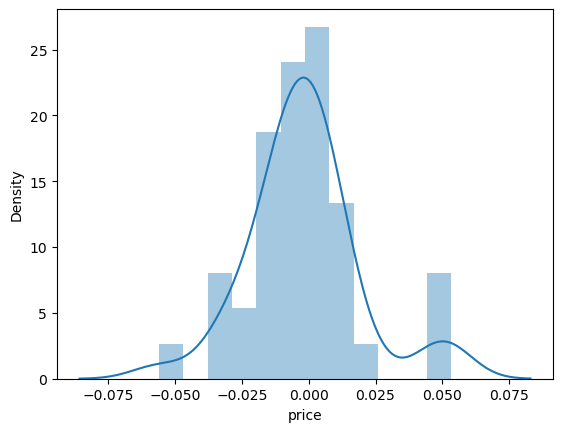

In [177]:
sns.distplot(residual)

In [178]:
#training data
y_pred_train=model.predict(x_train)
mse_train=mean_squared_error(y_train,y_pred_train)
mae_train=mean_absolute_error(y_train,y_pred_train)
train=r2_score(y_train,y_pred_train)
print('mse_train',mse_train)
print('mae_train',mae_train)
print('train r2 score',train)

mse_train 0.00026915416898297395
mae_train 0.012471414961353969
train r2 score 0.8957818738108453


In [605]:
#testing data
y_pred_test=model.predict(x_test)
mse_test=mean_squared_error(y_test,y_pred_test)
mae_test=mean_absolute_error(y_test,y_pred_test)
test=r2_score(y_test,y_pred_test)
print('mse_test',mse_test)
print('mae_test',mae_test)
print('test r2 score',test)

mse_test 0.0004237423042824774
mae_test 0.014387267934264291
test r2 score 0.8716131501914233


## Regularization

In [614]:
l2=Ridge(1)

In [181]:
l2.fit(x_train,y_train)

Ridge(alpha=1)

In [606]:
l2.score(x_train,y_train)*100

89.04912909460619

In [607]:
l2.score(x_test,y_test)*100

88.03419583213746

## Gradient Boosting Regressor

In [549]:
gd_b=GradientBoostingRegressor()

In [550]:
gd_b.fit(x_train,y_train)

GradientBoostingRegressor()

In [551]:
y_pred1=gd_b.predict(x_test)
y_pred_train=gd_b.predict(x_train)

In [613]:
#hyperparameter tuning
para={
    'learning_rate':[0.1,0.3,0.5,0.7],
    'n_estimators':[50,100,150,200],
    'max_depth':[3,4,5,6],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[1,2,3,4]
}

In [612]:
gd=RandomizedSearchCV(gd_b,para,cv=5) #randomized search

In [599]:
gd.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.1, 0.3, 0.5, 0.7,
                                                          0.9],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [50, 100, 150, 200]})

In [600]:
best=gd.best_estimator_

In [601]:
best.fit(x_train,y_train)

GradientBoostingRegressor(min_samples_leaf=3, min_samples_split=3,
                          n_estimators=50)

In [610]:
best.score(x_train,y_train)*100 #train

97.12918456250596

In [611]:
best.score(x_test,y_test)*100 #test

91.05286592258103